In [1]:
from urllib.request import urlretrieve

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x2663f4fd220>)

In [4]:
import pandas as pd

In [5]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [9]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [10]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [17]:
#retrieving data from a dataframe

In [21]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [23]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [25]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [27]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [29]:
covid_df['new_cases'][246]

975.0

In [31]:
covid_df.at[246,'new_cases']

975.0

In [33]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [35]:
cases_df = covid_df[['date', 'new_cases']]

In [37]:
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [39]:
 covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [41]:
covid_df.new_tests.first_valid_index()

111

In [43]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
74,2020-03-14,2547.0,252.0,NaN
167,2020-06-15,338.0,44.0,17463.0
52,2020-02-21,0.0,0.0,NaN
41,2020-02-10,0.0,0.0,NaN
155,2020-06-03,318.0,55.0,20035.0
209,2020-07-27,254.0,5.0,19374.0
3,2020-01-03,0.0,0.0,NaN
14,2020-01-14,0.0,0.0,NaN
242,2020-08-29,1460.0,9.0,64294.0
151,2020-05-30,516.0,87.0,36051.0


In [45]:
 #Analyzing data from data frames

In [47]:
total_cases = covid_df.new_cases.sum()
total_deaths =covid_df.new_deaths.sum()

In [49]:
print('The number of reported cases is {} and the number of reported deaths is {}'.format(total_cases, total_deaths))

The number of reported cases is 271515.0 and the number of reported deaths is 35497.0


In [51]:
#What is the overall death ratio

In [53]:
death_rate = covid_df.new_deaths.sum()/covid_df.new_cases.sum()

In [55]:
death_rate

0.13073679170579894

In [57]:
print('The overall death rate reported in Italy is {:.2f}%'.format(death_rate*100))

The overall death rate reported in Italy is 13.07%


In [59]:
#Total_number of tests conducted
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [62]:
#fraction of test that returned positive
positive_rate = total_cases / total_tests

In [64]:
print('{:.2f}% of tested people turns out positive in italy'.format(positive_rate*100))

5.21% of tested people turns out positive in italy


In [66]:
high_new_cases = covid_df['new_cases'] > 1000

In [68]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [70]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [72]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [74]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [76]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [78]:
positive_rate

0.05206657403227681

In [80]:
#Determine the number od days were the number of people who got infected were more than the average

In [82]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [84]:
high_ratio_df

,date,new_cases,new_deaths,new_tests,positive_rate
111,2020-04-20,3047.0,433.0,7841.0,0.388598
112,2020-04-21,2256.0,454.0,28095.0,0.080299
113,2020-04-22,2729.0,534.0,44248.0,0.061675
114,2020-04-23,3370.0,437.0,37083.0,0.090877
116,2020-04-25,3021.0,420.0,38676.0,0.078110
117,2020-04-26,2357.0,415.0,24113.0,0.097748
118,2020-04-27,2324.0,260.0,26678.0,0.087113
120,2020-04-29,2091.0,382.0,38589.0,0.054186
123,2020-05-02,1965.0,269.0,31231.0,0.062918
124,2020-05-03,1900.0,474.0,27047.0,0.070248


In [86]:
#Drop positive_rate as we are unablto really use it in analysis due to its limitataions.. Tests results take time, hence some new cases recorded for each day may be from tests from previous days

In [88]:
covid_df.drop(columns=['positive_rate'], inplace = True)

In [90]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [92]:
#Arrange in order

In [94]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [96]:
covid_df.sort_values('new_cases', ascending=True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [98]:
#Noticed that there is a negative value in 172, which could have been a data entry error, or the givt is trying to account for some errors in the previously poplished data

In [100]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases']) / 2

In [103]:
#Working with dates

In [105]:
covid_df['date']

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [107]:
#Convert to date date/time format

In [109]:
covid_df.date = pd.to_datetime(covid_df.date)

In [111]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [113]:
# You can extract different parts of the data into seperate columns

In [115]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [117]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [119]:
#display where the month is may

covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [121]:
#Calculate the sume of new cases, tests, and deaths in May

In [123]:
#Extract the work columns you want to work with
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

In [125]:
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [127]:
covid_df_may_metrics.sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [129]:
#The above line can be written using one code
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [131]:
#try for the month of January
covid_df[covid_df.month == 1] [['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases     3.0
new_deaths    0.0
new_tests     0.0
dtype: float64

In [133]:
#Determine if the cases reported on Sundays is higher than the average of cases reported everyday.

In [135]:
#overall average
covid_df.new_cases.mean()

1096.6149193548388

In [137]:
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

In [139]:
#Grouping and agrregating data

In [283]:
monthly_group = covid_month_df = covid_df.groupby('month')

In [289]:
covid_month_df = monthly_group[['new_cases', 'new_deaths', 'new_tests']].sum()

In [291]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [145]:
#Average number of cases by weekday

In [277]:
weekday_group = covid_df.groupby('weekday')

In [279]:
weekday_group[['new_cases', 'new_deaths', 'new_tests']].mean()

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [151]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [153]:
#Cummulative aggregate

In [155]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [157]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum()

In [159]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


In [162]:
# Merging data from multiple suces

In [164]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x2664066ab40>)

In [166]:
locations_df = pd.read_csv('locations.csv')

In [168]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [170]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [172]:
covid_df['location'] = 'Italy'

In [174]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


In [176]:
merged_df = covid_df.merge(locations_df, on = "location")

In [178]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [180]:
#Calculate the total number of cases etc per million 

merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [182]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


In [184]:
#someimes we create multiple columns that we don't need, the needed column can be exported and save to keep them for future use.

In [241]:
result_df = merged_df[['date', 
                       'new_cases',
                       'new_deaths',
                       'total_cases',
                       'total_deaths',
                       'total_tests',
                       'cases_per_million',
                       'deaths_per_million',
                       'tests_per_million']]

In [243]:
result_df

,date,new_cases,new_deaths,total_cases,total_deaths,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,267298.5,35473.0,4182478.0,4420.946386,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,268663.5,35477.0,4225061.0,4443.522614,586.766910,69879.809125
245,2020-09-01,996.0,6.0,269659.5,35483.0,4279456.0,4459.995818,586.866146,70779.467667
246,2020-09-02,975.0,8.0,270634.5,35491.0,NaN,4476.121695,586.998461,NaN


In [245]:
# Save the data from the dataframe into a file

result_df.to_csv('results.csv', index = None)

In [247]:
#Plotting with Pandas

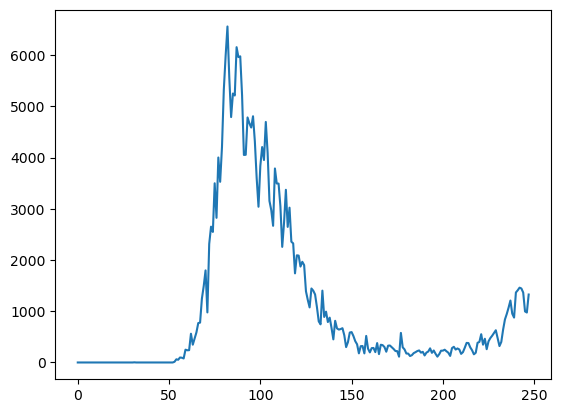

In [249]:
result_df.new_cases.plot();

In [251]:
#allocating the date to the index

result_df.set_index('date', inplace = True)

In [229]:
result_df

,new_cases,new_deaths,total_deaths,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,
2019-12-31,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,35473.0,4182478.0,4420.946386,586.700753,69175.513516
2020-08-31,1365.0,4.0,35477.0,4225061.0,4443.522614,586.766910,69879.809125
2020-09-01,996.0,6.0,35483.0,4279456.0,4459.995818,586.866146,70779.467667


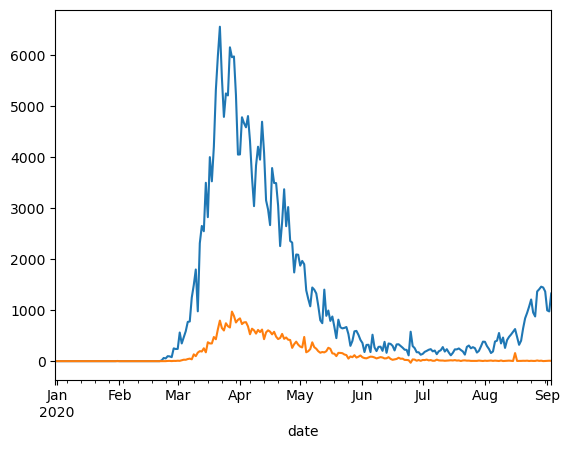

In [233]:
#Compare cases and deaths

result_df.new_cases.plot()
result_df.new_deaths.plot();

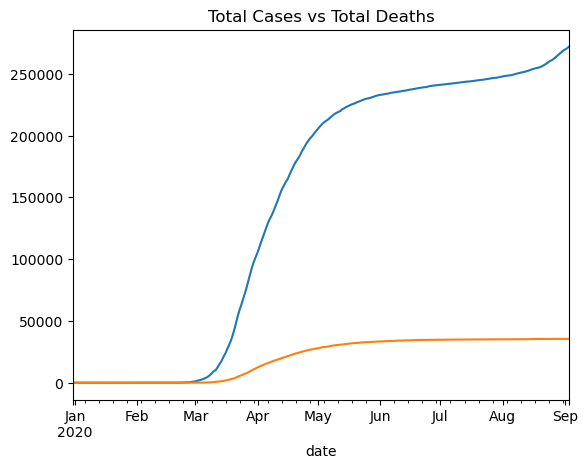

In [257]:
#Compare total cases and total deaths

result_df.total_cases.plot(title = 'Total Cases vs Total Deaths')
result_df.total_deaths.plot();

In [255]:
death_rate = result_df.total_deaths / result_df.total_cases

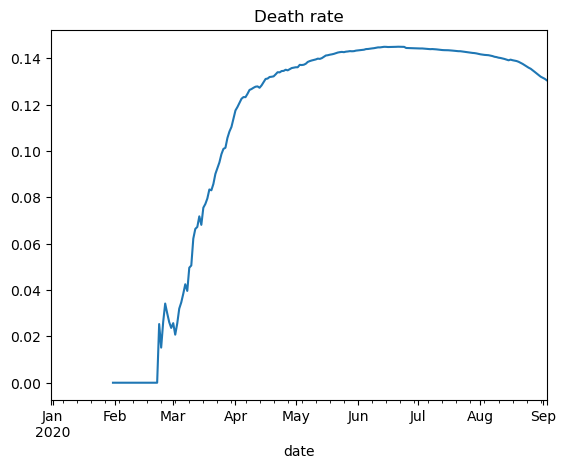

In [265]:
death_rate.plot(title = 'Death rate');

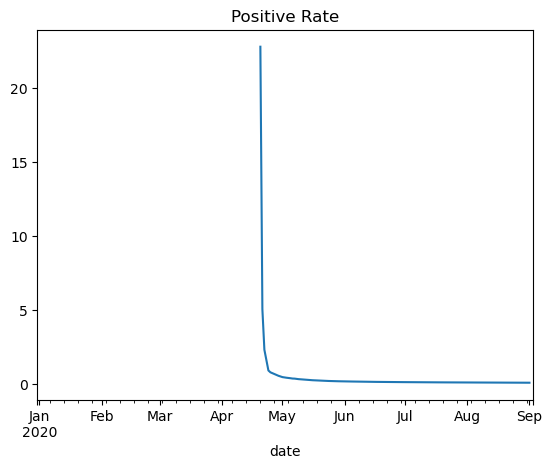

In [267]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title ='Positive Rate');

In [313]:
#Visualizethe data per month
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


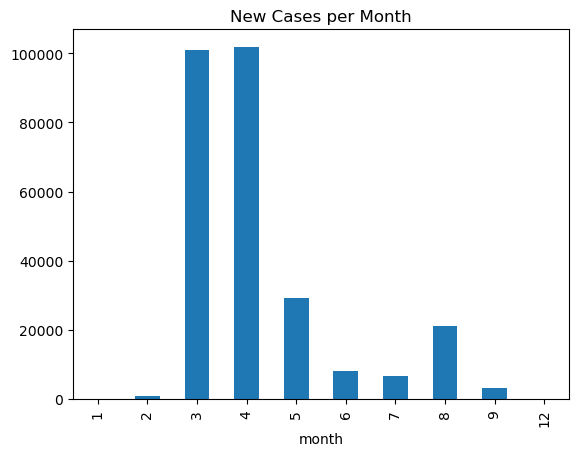

In [303]:
covid_month_df.new_cases.plot(kind = 'bar', title = 'New Cases per Month');